# TODO: descrizione strumenti usati

In [5]:
# 1. Import e configurazioni
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 2. Caricamento dati e pulizia iniziale

# File locale
file_path = "Archivio_unico_indicatori_regionali.csv"

# Caricamento colonne
df = pd.read_csv(
    file_path,
    sep=';',
    low_memory=False,
    decimal=',',
    thousands='.'
)

print(f"File caricato: {file_path}")

# Visualizzo le prime 5 righe
df.head()

File caricato: Archivio_unico_indicatori_regionali.csv


,COD_INDICATORE,TITOLO,SOTTOTITOLO,ANNO_RIFERIMENTO,UNITA_MISURA,VALORE,ID_RIPARTIZIONE,DESCRIZIONE_RIPARTIZIONE,ID_ASSE,DESCRIZIONE_ASSE_QCS,...,DESCRIZIONE_PRIORITA_QSN,ID_TEMA1,DESCRIZIONE_TEMA1,ID_TEMA2,DESCRIZIONE_TEMA2,1° ID_OBIETTIVO,1° OBIETTIVO,2° ID_OBIETTIVO,2° OBIETTIVO,OC_TEMA_SINTETICO
0,1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1995,migliaia di euro,"21,7996899471312",1,Piemonte,4,Asse IV - Sistemi locali di sviluppo.,...,7 - Competitività dei sistemi produttivi e occ...,34,Dinamiche settoriali,NaN,NaN,3.0,Obiettivo Tematico 3,NaN,NaN,Competitività per le imprese
1,1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1996,migliaia di euro,"22,1301853488336",1,Piemonte,4,Asse IV - Sistemi locali di sviluppo.,...,7 - Competitività dei sistemi produttivi e occ...,34,Dinamiche settoriali,NaN,NaN,3.0,Obiettivo Tematico 3,NaN,NaN,Competitività per le imprese
2,1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1997,migliaia di euro,"21,8351440567581",1,Piemonte,4,Asse IV - Sistemi locali di sviluppo.,...,7 - Competitività dei sistemi produttivi e occ...,34,Dinamiche settoriali,NaN,NaN,3.0,Obiettivo Tematico 3,NaN,NaN,Competitività per le imprese
3,1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1998,migliaia di euro,"22,5576057099927",1,Piemonte,4,Asse IV - Sistemi locali di sviluppo.,...,7 - Competitività dei sistemi produttivi e occ...,34,Dinamiche settoriali,NaN,NaN,3.0,Obiettivo Tematico 3,NaN,NaN,Competitività per le imprese
4,1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1999,migliaia di euro,"24,2888539200584",1,Piemonte,4,Asse IV - Sistemi locali di sviluppo.,...,7 - Competitività dei sistemi produttivi e occ...,34,Dinamiche settoriali,NaN,NaN,3.0,Obiettivo Tematico 3,NaN,NaN,Competitività per le imprese


In [7]:
# 3. Pulizia dei dati

df = df.copy()

# Normalizzazione e sistemazione delle colonne
df.columns = [
    c.strip()
     .replace(" ", "_")
     .replace("°", "o")
     .replace("'", "")
     .lower()
    for c in df.columns
]

df.rename(columns={
    'titolo': 'indicatore',
    'anno_riferimento': 'anno',
    'descrizione_ripartizione': 'regione',
}, inplace=True)

# Conversione del valore numerico
if 'valore' in df.columns:
    df['valore'] = (
        df['valore']
        .astype(str)
        .str.replace('\u00A0', '', regex=False)
        .str.replace(' ', '', regex=False)
    )

    df['valore'] = df['valore'].str.replace(',', '.', regex=False)
    df['valore'] = pd.to_numeric(df['valore'], errors='coerce')

# Tengo in considerazione solo le colonne utili
keep_cols = [
    'indicatore', 'sottotitolo', 'anno',
    'unita_misura', 'valore', 'regione', 'oc_tema_sintetico'
]
df_clean = df[keep_cols].copy()

# Creazione colonna con valore standardizzato
df_clean['valore_std'] = df_clean['valore']

# Conversione per unità di misura
mask_migliaia = df_clean['unita_misura'].str.contains('migliaia', case=False, na=False)
mask_milioni  = df_clean['unita_misura'].str.contains('milioni',  case=False, na=False)

df_clean.loc[mask_migliaia, 'valore_std'] = df_clean.loc[mask_migliaia, 'valore_std'] * 1000
df_clean.loc[mask_milioni,  'valore_std'] = df_clean.loc[mask_milioni,  'valore_std'] * 1_000_000

# Visualizzazione delle prime 5 righe
df_clean.head()


,indicatore,sottotitolo,anno,unita_misura,valore,regione,oc_tema_sintetico,valore_std
0,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1995,migliaia di euro,21.799690,Piemonte,Competitività per le imprese,21799.689947
1,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1996,migliaia di euro,22.130185,Piemonte,Competitività per le imprese,22130.185349
2,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1997,migliaia di euro,21.835144,Piemonte,Competitività per le imprese,21835.144057
3,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1998,migliaia di euro,22.557606,Piemonte,Competitività per le imprese,22557.605710
4,Produttività del lavoro in agricoltura,"Valore aggiunto dell'agricoltura, della caccia...",1999,migliaia di euro,24.288854,Piemonte,Competitività per le imprese,24288.853920


In [8]:
# 4. Visualizzazione macrotemi

print("Diamo un occhiata ai macrotemi:")
print(df_clean['oc_tema_sintetico'].unique())

Diamo un occhiata ai macrotemi:
['Competitività per le imprese' 'Ambiente e prevenzione dei rischi'
 'Occupazione e mobilità dei lavoratori'
 'Attrazione culturale, naturale e turistica'
 'Trasporti e infrastrutture a rete' 'Rinnovamento urbano e rurale'
 'Energia e efficienza energetica' 'Agenda digitale' 'Istruzione'
 'Rafforzamento delle capacità della PA' 'Inclusione sociale'
 'Ricerca e innovazione ' 'Servizi di cura infanzia e anziani']


In [9]:
# 5. Filtro per gli indicatori ambientali

keywords = ['ambiente','ambientale','emissioni','energia','rifiuti','riciclo','acqua','aria','inquinamento',
            'suolo','verde','biodivers', 'rinnovabili', 'clima']
temi_chiave = ['Ambiente e prevenzione dei rischi', 'Energia e efficienza energetica'] # Questi sono ipotetici, basati sull'output del tuo file

mask_kw = pd.Series(False, index=df_clean.index)
for kw in keywords:
    mask_kw = mask_kw | df_clean['indicatore'].str.lower().str.contains(kw, na=False)

# Maschera basata sul tema sintetico
mask_tema = df_clean['oc_tema_sintetico'].isin(temi_chiave)

# Filtro finale: O Keywords O Tema (logica inclusiva)
df_env = df_clean[mask_kw | mask_tema].copy()

print("\nRighe totali con filtro combinato:", len(df_env))
print("Gli ndicatori unici con filtro combinato sono n.", df_env['indicatore'].nunique())
print("E sono:", df_env['indicatore'].unique())


Righe totali con filtro combinato: 35586
Gli ndicatori unici con filtro combinato sono n. 94
E sono: ["Irregolarità nella distribuzione dell'acqua"
 'Disponibilità di risorse idropotabili'
 "Efficienza nella distribuzione dell'acqua per il consumo umano"
 'Popolazione regionale servita da impianti di depurazione completa delle acque reflue'
 'Quota di popolazione equivalente servita da depurazione'
 'Elementi fertilizzanti usati in agricoltura'
 'Principi attivi contenuti nei prodotti fitosanitari'
 'Raccolta differenziata dei rifiuti urbani'
 'Quantità di frazione umida trattata in impianti di compostaggio per la produzione di compost di qualità'
 'Interruzioni del servizio elettrico'
 'Energia prodotta da fonti rinnovabili'
 'Potenza efficiente lorda delle fonti rinnovabili'
 'Popolazione regionale servita da gas metano'
 'Rifiuti urbani smaltiti in discarica per abitante'
 'Consumi di energia elettrica coperti da fonti rinnovabili (incluso idro)'
 'Consumi di energia elettrica cope

In [10]:
# 6. Controllo denominazioni regioni

print("Le regioni presenti nel dataset sono:",  df_env['regione'].unique())
print("\nPer un totale di: ", len(df_env['regione'].unique()))
print("\nRimuoviamo le regioni non rilevanti e rinominiamone alcune")

# Rimozione i totali aggregati
df_env = df_env[~df_env['regione'].isin(['Nord', 'Nord-ovest', 'Nord-est', 'Centro', 'Centro-Nord', 'Mezzogiorno', 'Sud', 'Isole', 'Regioni più sviluppate', 'Regioni in transizione', 'Regioni meno sviluppate', 'Ciclo di programmazione F. S. 2021-27', 'Ciclo di programmazione F. S. 2014-20', 'Bolzano/Bozen', 'Trento', 'Italia'])]

# Rinominazione delle regioni
df_env['regione'] = df_env['regione'].replace({
    "Valle d'Aosta/Vallée d'Aoste": "Valle d'Aosta",
    "Trentino-Alto Adige/Südtirol": "Trentino-Alto Adige"
})

print("Ora le regioni aggiornate sono:",  df_env['regione'].unique())
print("\nPer un totale di: ", len(df_env['regione'].unique()))

Le regioni presenti nel dataset sono: ['Piemonte' "Valle d'Aosta/Vallée d'Aoste" 'Lombardia'
 'Trentino-Alto Adige/Südtirol' 'Veneto' 'Friuli-Venezia Giulia' 'Liguria'
 'Emilia-Romagna' 'Toscana' 'Umbria' 'Marche' 'Lazio' 'Abruzzo' 'Molise'
 'Campania' 'Puglia' 'Basilicata' 'Calabria' 'Sicilia' 'Sardegna'
 'Bolzano/Bozen' 'Trento' 'Italia' 'Nord' 'Nord-ovest' 'Nord-est' 'Centro'
 'Centro-Nord' 'Mezzogiorno' 'Sud' 'Isole' 'Regioni più sviluppate'
 'Regioni in transizione' 'Regioni meno sviluppate'
 'Ciclo di programmazione F. S. 2021-27'
 'Ciclo di programmazione F. S. 2014-20']

Per un totale di:  36

Rimuoviamo le regioni non rilevanti e rinominiamone alcune
Ora le regioni aggiornate sono: ['Piemonte' "Valle d'Aosta" 'Lombardia' 'Trentino-Alto Adige' 'Veneto'
 'Friuli-Venezia Giulia' 'Liguria' 'Emilia-Romagna' 'Toscana' 'Umbria'
 'Marche' 'Lazio' 'Abruzzo' 'Molise' 'Campania' 'Puglia' 'Basilicata'
 'Calabria' 'Sicilia' 'Sardegna']

Per un totale di:  20


In [11]:
# 7. Analisi dell'indicatore scelto

INDICATORE_SCELTO = "Consumi di energia elettrica coperti da fonti rinnovabili (incluso idro)"

print(f"Indicatore analizzato: {INDICATORE_SCELTO}")

df_analisi = df_env[df_env['indicatore'] == INDICATORE_SCELTO].copy()
df_analisi.dropna(subset=['valore'], inplace=True)

# Verifica il range temporale effettivo e le regioni
print(f"Anni disponibili: {df_analisi['anno'].min()} - {df_analisi['anno'].max()}")
print(f"Totale regioni per analisi: {df_analisi['regione'].nunique()}")

# Calcolo della media del valore su tutti gli anni per ogni regione e ordiniamo in modo decrescente
df_analisi_media_regionale = df_analisi.groupby('regione')['valore_std'].mean().sort_values(ascending=False).reset_index()

print("\nUnità di misura: percentuale")
print("Top 5 Regioni per copertura media da rinnovabili (2000-2023):")
# Mostriamo le prime 5 righe (la tabella visuale)
df_analisi_media_regionale.head()

Indicatore analizzato: Consumi di energia elettrica coperti da fonti rinnovabili (incluso idro)
Anni disponibili: 2000 - 2023
Totale regioni per analisi: 20

Unità di misura: percentuale
Top 5 Regioni per copertura media da rinnovabili (2000-2023):


,regione,valore_std
0,Valle d'Aosta,266.143632
1,Trentino-Alto Adige,142.088867
2,Molise,57.164851
3,Basilicata,54.804514
4,Calabria,52.386180


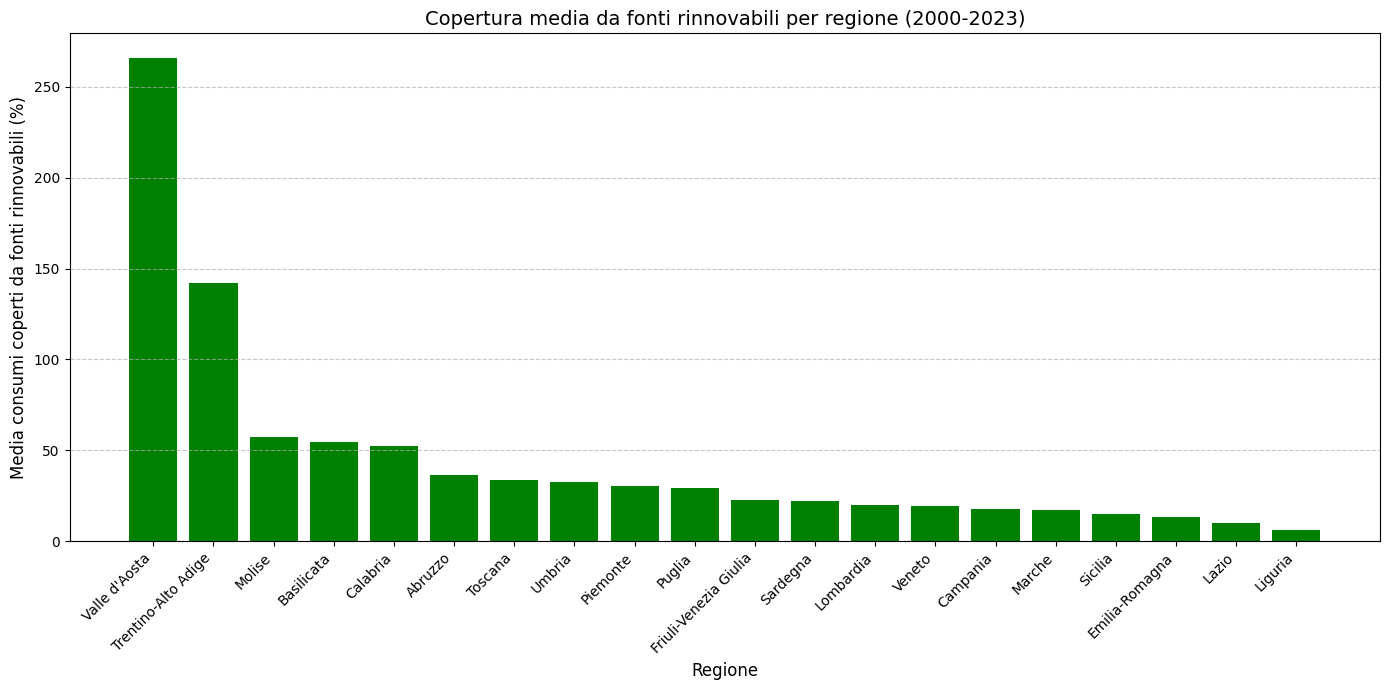

In [12]:
# 8. Visualizzazione grafico copertura media da fonti rinnovabili per regione

# Creiamo il grafico a barre, ordinato per la media del valore
plt.figure(figsize=(14, 7))
plt.bar(df_analisi_media_regionale['regione'], df_analisi_media_regionale['valore_std'], color='green')

# Formattazione
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title(f"Copertura media da fonti rinnovabili per regione ({df_analisi['anno'].min()}-{df_analisi['anno'].max()})", fontsize=14)
plt.ylabel("Media consumi coperti da fonti rinnovabili (%)", fontsize=12)
plt.xlabel("Regione", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

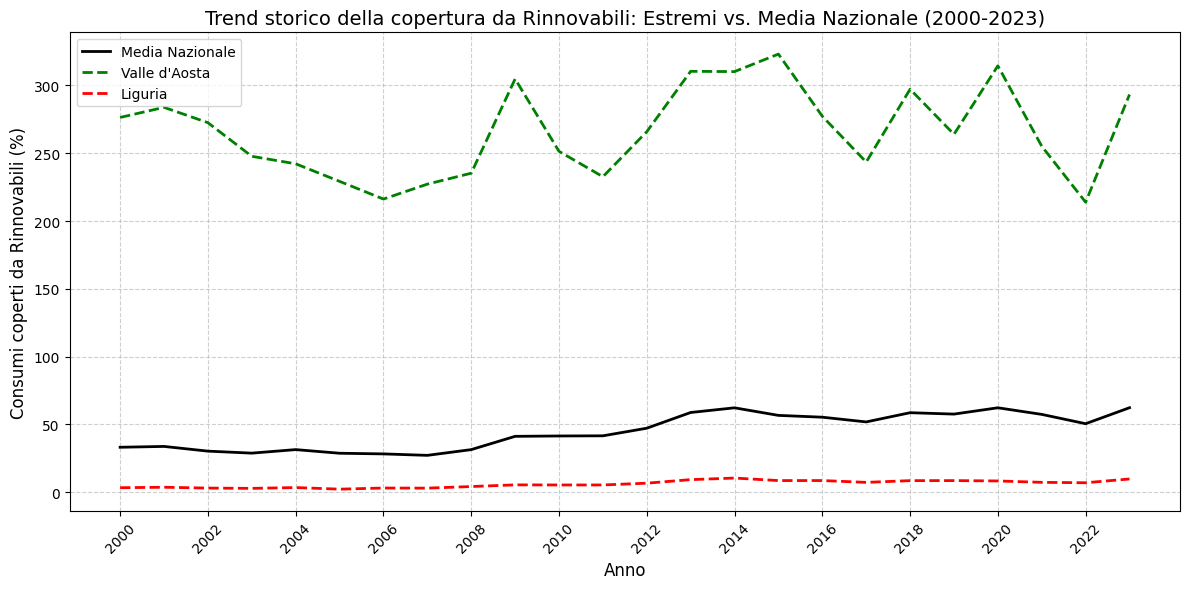

In [ ]:
# 9. Visualizzazione grafico del trend storico a confronto

# Calcolo media nazionale
df_trend_nazionale = df_analisi.groupby('anno')['valore_std'].mean().reset_index(name='Nazionale')

# Identificazione regione migliore e peggiore
best_region = df_analisi_media_regionale['regione'].iloc[0]
worst_region = df_analisi_media_regionale['regione'].iloc[-1]
df_trend_estremi = df_analisi[df_analisi['regione'].isin([best_region, worst_region])]
df_trend_estremi = df_trend_estremi.pivot(index='anno', columns='regione', values='valore_std').reset_index()

# Uniamo i trend delle regioni estreme con la media nazionale
df_trend_finale = pd.merge(df_trend_nazionale, df_trend_estremi, on='anno', how='inner')

plt.figure(figsize=(12, 6))

# Linea della media nazionale (scura, spessa)
plt.plot(df_trend_finale['anno'], df_trend_finale['Nazionale'], label='Media Nazionale', color='black', linewidth=2)
# Linea della migliore regione (verde, tratteggiata)
plt.plot(df_trend_finale['anno'], df_trend_finale[best_region], label=best_region, color='green', linestyle='--', linewidth=2)
# Linea della peggiore regione (rossa, punteggiata)
plt.plot(df_trend_finale['anno'], df_trend_finale[worst_region], label=worst_region, color='red', linestyle='--', linewidth=2)

# Formattazione
plt.title(f"Trend storico della copertura da Rinnovabili: Estremi vs. Media Nazionale (2000-2023)", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Consumi coperti da Rinnovabili (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_trend_finale['anno'][::2], rotation=45)
plt.tight_layout()
plt.show()